In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
source = pd.read_csv('drivface.txt')
source.head()

,fileName,subject,imgNum,label,ang,xF,yF,wF,hF,xRE,yRE,xLE,yLE,xN,yN,xRM,yRM,xLM,yLM
0,20130529_01_Driv_001_f,1,1,2,0,292,209,100,112,323,232,367,231,353,254,332,278,361,278
1,20130529_01_Driv_002_f,1,2,2,0,286,200,109,128,324,235,366,235,353,258,333,281,361,281
2,20130529_01_Driv_003_f,1,3,2,0,290,204,105,121,325,240,367,239,351,260,334,282,362,282
3,20130529_01_Driv_004_f,1,4,2,0,287,202,112,118,325,230,369,230,353,253,335,274,362,275
4,20130529_01_Driv_005_f,1,5,2,0,290,193,104,119,325,224,366,225,353,244,333,268,363,268


In [3]:
source.info()

<class 'pandas.core.frame.DataFrame'>
Index: 606 entries, 20130529_01_Driv_001_f  to 20130530_04_Driv_090_f 
Data columns (total 18 columns):
subject    606 non-null int64
imgNum     606 non-null int64
label      606 non-null int64
ang        606 non-null int64
xF         606 non-null int64
yF         606 non-null int64
wF         606 non-null int64
hF         606 non-null int64
xRE        606 non-null int64
yRE        606 non-null int64
xLE        606 non-null int64
yLE        606 non-null int64
xN         606 non-null int64
yN         606 non-null int64
xRM        606 non-null int64
yRM        606 non-null int64
xLM        606 non-null int64
yLM        606 non-null int64
dtypes: int64(18)
memory usage: 90.0+ KB


In [13]:
source = source.drop(columns = ['subject','label','ang'])

In [14]:
source.isnull().values.any()

False

In [19]:
data1 = source.drop(columns= ['fileName', 'imgNum'])
data1.describe()
data2 = data1

data2['aF'] = data1.wF*data1.hF
data2['dRN'] = np.sqrt(pow(data1.xRE-data1.xN,2)+pow(data1.yRE-data1.yN,2))
data2['dLN'] = np.sqrt(pow(data1.xLE-data1.xN,2)+pow(data1.yLE-data1.yN,2))

data2

,xF,yF,wF,hF,xRE,yRE,xLE,yLE,xN,yN,xRM,yRM,xLM,yLM,aF,dRN,dLN
0,292,209,100,112,323,232,367,231,353,254,332,278,361,278,11200,37.202150,26.925824
1,286,200,109,128,324,235,366,235,353,258,333,281,361,281,13952,37.013511,26.419690
2,290,204,105,121,325,240,367,239,351,260,334,282,362,282,12705,32.802439,26.400758
3,287,202,112,118,325,230,369,230,353,253,335,274,362,275,13216,36.235342,28.017851
4,290,193,104,119,325,224,366,225,353,244,333,268,363,268,12376,34.409301,23.021729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,278,183,128,141,307,218,354,210,330,247,324,273,356,266,18048,37.013511,44.102154
602,268,186,128,134,296,222,344,212,319,247,316,274,347,269,17152,33.970576,43.011626
603,264,187,127,131,287,220,334,211,304,247,305,272,337,270,16637,31.906112,46.861498
604,264,175,143,136,295,207,345,200,320,234,314,261,351,251,19448,36.796739,42.201896


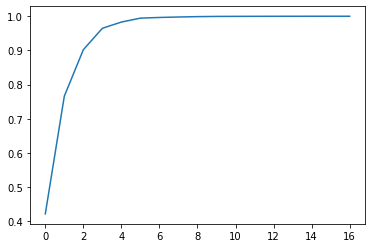

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

features = list(data1.columns)
x = data1.loc[:, features].values
x = StandardScaler().fit_transform(x)
pca = PCA().fit(x)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.xlabel('Number of Components')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

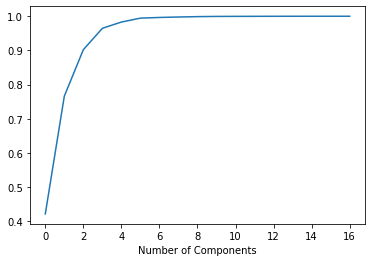

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

features2 = list(data2.columns)
x2 = data2.loc[:, features2].values
x2 = StandardScaler().fit_transform(x2)
pca = PCA().fit(x2)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.xlabel('Number of Components')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

very little influence...

In [24]:
from sklearn.cluster import KMeans
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02
mean,-9.878420e-16,-5.296460e-16,9.064989e-16,-1.157490e-15,5.741648e-16,3.185937e-16,-6.884848e-16,-2.308385e-16,-3.686087e-16,-5.296460e-16,-1.037674e-15,8.192933e-16,1.800906e-16,5.153560e-16,3.348990e-16,1.180757e-16,-1.908997e-16
std,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00
min,-2.354329e+00,-1.583320e+00,-3.624508e+00,-2.660409e+00,-2.981200e+00,-1.602411e+00,-3.074151e+00,-1.685640e+00,-3.395781e+00,-1.667682e+00,-3.122363e+00,-1.595208e+00,-3.070833e+00,-1.627470e+00,-2.921474e+00,-3.634465e+00,-2.075582e+00
25%,-8.119253e-01,-8.407579e-01,-6.990631e-01,-6.757940e-01,-7.389052e-01,-8.166357e-01,-8.481797e-01,-8.191665e-01,-6.760555e-01,-7.539020e-01,-7.506507e-01,-8.278874e-01,-7.585897e-01,-7.742099e-01,-5.704068e-01,-6.066258e-01,-6.575149e-01
50%,3.905597e-02,-3.472873e-02,-2.528673e-03,1.414004e-01,-7.722066e-03,-5.705299e-02,1.185448e-02,-5.171877e-02,-1.672799e-02,-9.394979e-02,3.991990e-02,-1.756649e-01,-1.396892e-02,-1.647384e-01,-7.994282e-02,7.520894e-02,-2.144166e-01
75%,5.709192e-01,1.158448e+00,5.546989e-01,7.251107e-01,6.259700e-01,1.147802e+00,6.695277e-01,1.136587e+00,6.425995e-01,1.149806e+00,6.723764e-01,1.192723e+00,5.869531e-01,1.218762e+00,6.300810e-01,6.550164e-01,5.717394e-01
max,3.389795e+00,1.716957e+00,4.176678e+00,2.592984e+00,3.258229e+00,1.802615e+00,3.097860e+00,1.780253e+00,3.238702e+00,1.860524e+00,2.885974e+00,1.832157e+00,2.938387e+00,1.858707e+00,3.699430e+00,2.879013e+00,3.356875e+00


In [25]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
kmeans.inertia_
kmeans.cluster_centers_

7017.552868241269

In [28]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

seems not so accurate...barely difference for different people

In [31]:
kmeans2 = KMeans(n_clusters=3, init='k-means++')
kmeans2.fit(x)
kmeans2.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

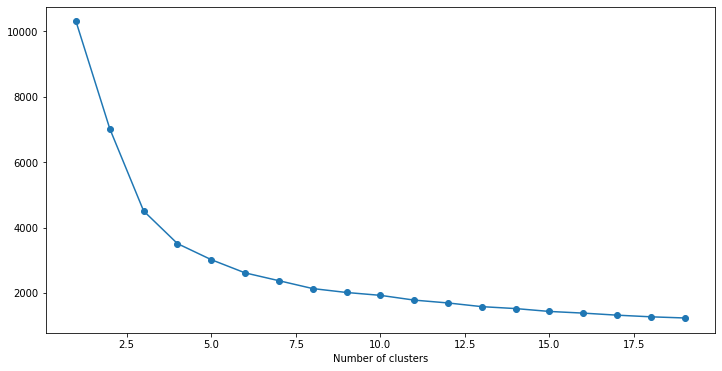

In [35]:
#fitting multiple k-means algos and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

#plot
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.show()


In [39]:
from scipy import stats
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2, min_samples = 10)
dbscan.fit(x).labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1, -1, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [40]:
dbscan = DBSCAN(eps=2, min_samples = 20)
gg = dbscan.fit(x).labels_
stats.describe(gg)

DescribeResult(nobs=606, minmax=(-1, 3), mean=1.0198019801980198, variance=1.8541526879960721, skewness=0.2787003506300712, kurtosis=-1.124876258768359)

In [41]:
dbscan = DBSCAN(eps=2, min_samples = 30)
gg = dbscan.fit(x).labels_
stats.describe(gg)

DescribeResult(nobs=606, minmax=(-1, 2), mean=0.5973597359735974, variance=1.1467037612852196, skewness=-0.10028546033215809, kurtosis=-1.2405943989168842)

In [42]:
dbscan = DBSCAN(eps=2, min_samples = 40)
gg = dbscan.fit(x).labels_
stats.describe(gg)

DescribeResult(nobs=606, minmax=(-1, 2), mean=0.46864686468646866, variance=1.2808335378992446, skewness=0.06408526313799251, kurtosis=-1.3849330245182079)

In [43]:
dbscan = DBSCAN(eps=2, min_samples = 50)
gg = dbscan.fit(x).labels_
stats.describe(gg)

DescribeResult(nobs=606, minmax=(-1, 2), mean=0.367986798679868, variance=1.3701470147014703, skewness=0.19565444601652474, kurtosis=-1.4379689191023453)

In [44]:
dbscan = DBSCAN(eps=1, min_samples = 10)
gg = dbscan.fit(x).labels_
stats.describe(gg)

DescribeResult(nobs=606, minmax=(-1, 5), mean=0.6336633663366337, variance=5.561443417068981, skewness=1.072568161350663, kurtosis=-0.5810092708364607)

In [45]:
dbscan = DBSCAN(eps=2, min_samples = 10)
gg = dbscan.fit(x).labels_
stats.describe(gg)

DescribeResult(nobs=606, minmax=(-1, 0), mean=-0.0627062706270627, variance=0.05887134167962249, skewness=-3.607529602027313, kurtosis=11.014269829503341)

In [46]:
dbscan = DBSCAN(eps=3, min_samples = 10)
gg = dbscan.fit(x).labels_
stats.describe(gg)

DescribeResult(nobs=606, minmax=(-1, 0), mean=-0.009900990099009901, variance=0.009819163734555271, skewness=-9.900000000000002, kurtosis=96.01000000000003)

In [47]:
dbscan = DBSCAN(eps=4, min_samples = 10)
gg = dbscan.fit(x).labels_
stats.describe(gg)

DescribeResult(nobs=606, minmax=(0, 0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)

In [48]:
dbscan = DBSCAN(eps=5, min_samples = 10)
gg = dbscan.fit(x).labels_
stats.describe(gg)

DescribeResult(nobs=606, minmax=(0, 0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)